In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tabulate import tabulate

In [68]:
df = pd.read_csv('cleaned-online-retail.csv', low_memory=False)

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df['TotalSales'] = df['Quantity'] * df['UnitPrice']


In [69]:
sns.set(style="whitegrid")

In [70]:
total_sales = df['TotalSales'].sum()

average_order_value = df.groupby('InvoiceNo')['TotalSales'].sum().mean()

print(f"Total Sales: £ {total_sales:.2f}")
print(f"Average Order Value: £ {average_order_value:.2f}")

Total Sales: £ 10642110.80
Average Order Value: £ 513.47


In [71]:
top_products = df.groupby(['StockCode', 'Description'])['TotalSales'].sum().sort_values(ascending=False).head(10)

# convert the series to a dataframe
top_products_df = top_products.reset_index()

top_products_df['TotalSales'] = top_products_df['TotalSales'].round(2)
top_products_df.index = top_products_df.index + 1

print("\nTop 10 Selling Products by Sales:\n")
print(tabulate(top_products_df, headers='keys', tablefmt='pretty', floatfmt='.2f'))


Top 10 Selling Products by Sales:

+----+-----------+------------------------------------+------------+
|    | StockCode |            Description             | TotalSales |
+----+-----------+------------------------------------+------------+
| 1  |   22423   |      REGENCY CAKESTAND 3 TIER      | 174156.54  |
| 2  |   23843   |    PAPER CRAFT , LITTLE BIRDIE     |  168469.6  |
| 3  |   85123   | WHITE HANGING HEART T-LIGHT HOLDER | 106236.72  |
| 4  |   47566   |           PARTY BUNTING            |  99445.23  |
| 5  |   85099   |      JUMBO BAG RED RETROSPOT       |  94159.81  |
| 6  |   23166   |   MEDIUM CERAMIC TOP STORAGE JAR   |  81700.92  |
| 7  |   23084   |         RABBIT NIGHT LIGHT         |  66870.03  |
| 8  |   22086   |   PAPER CHAIN KIT 50'S CHRISTMAS   |  64875.59  |
| 9  |   84879   |   ASSORTED COLOUR BIRD ORNAMENT    |  58927.62  |
| 10 |   79321   |           CHILLI LIGHTS            |  54096.36  |
+----+-----------+------------------------------------+------------

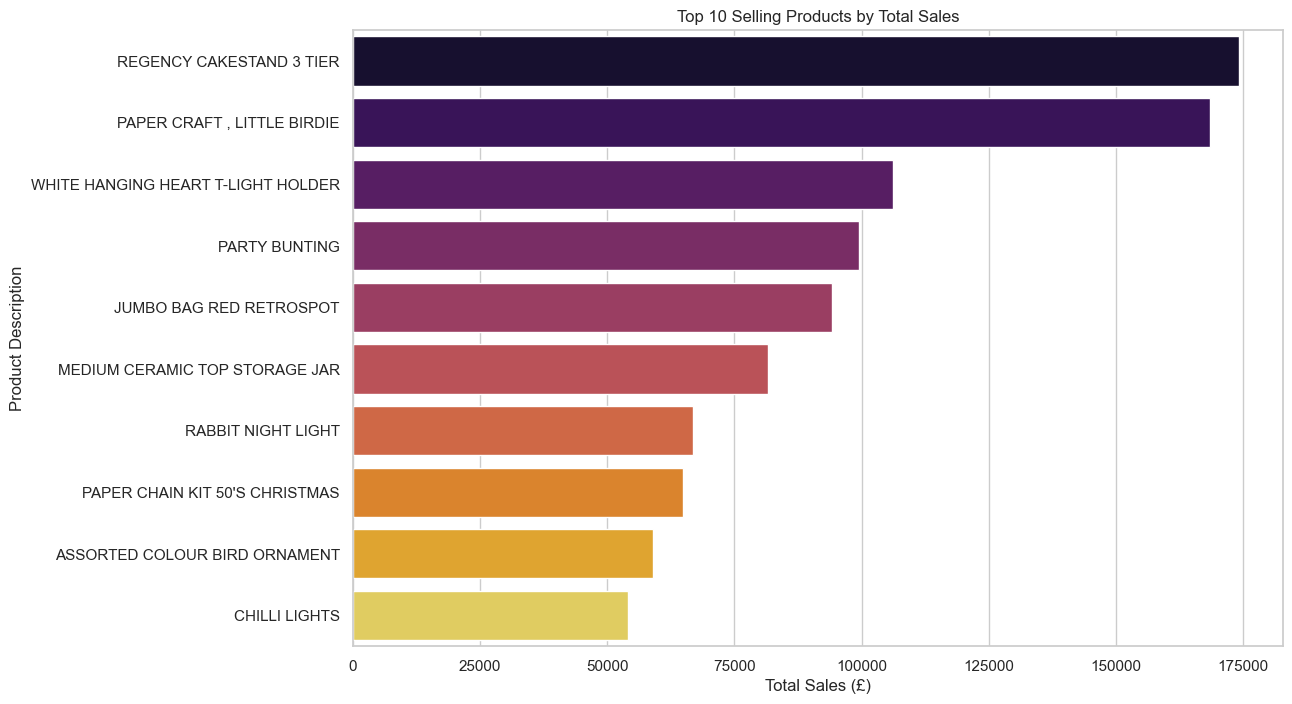

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products_df, x='TotalSales', y='Description', palette='inferno', hue='Description', legend=False)
plt.title('Top 10 Selling Products by Total Sales')
plt.xlabel('Total Sales (£)')
plt.ylabel('Product Description')
plt.show()

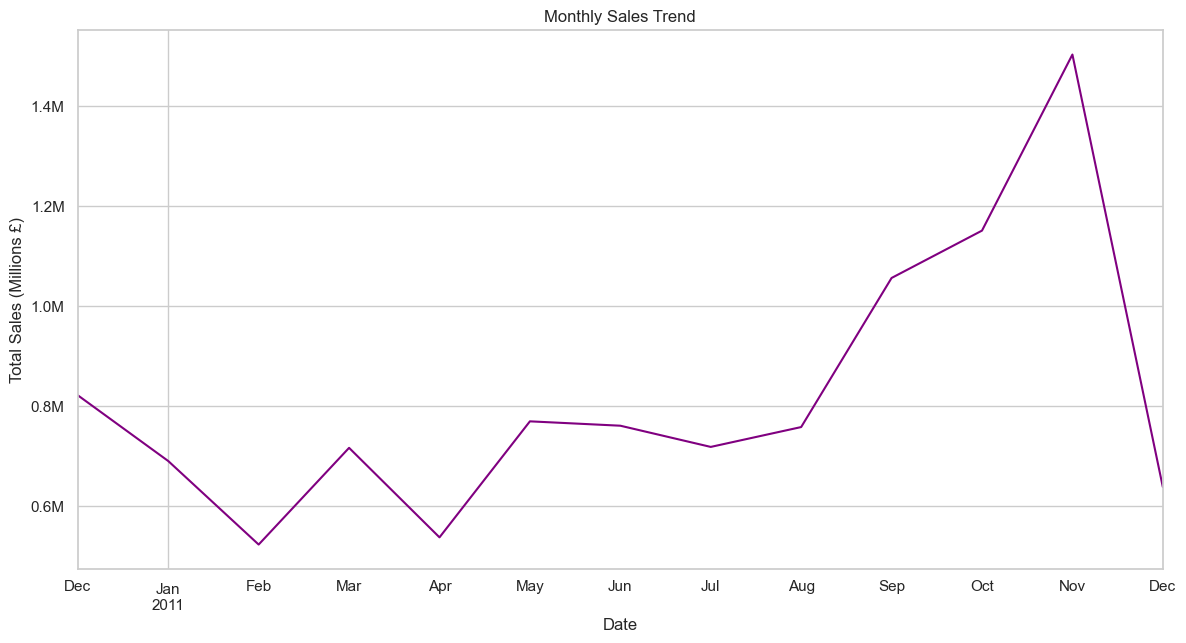

In [73]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()

# plot monthly sales trend
plt.figure(figsize=(14, 7))
ax = monthly_sales.plot(color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (Millions £)')
plt.grid(True)

# format y-axis to display in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.1f}M'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.show()

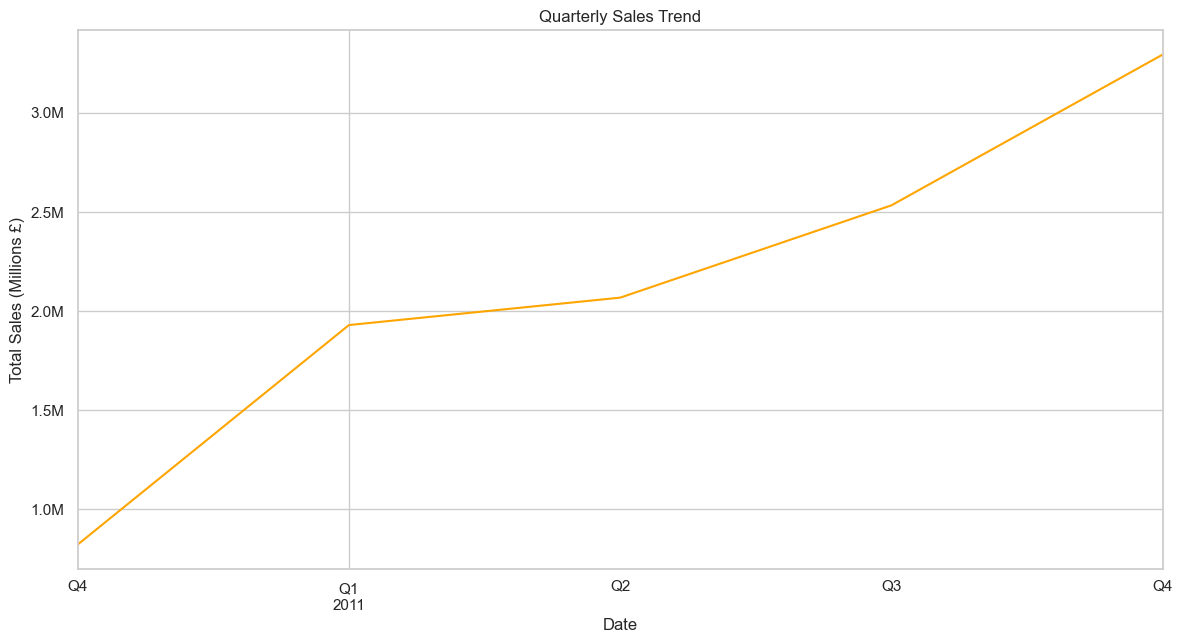

In [74]:
quarterly_sales = df.groupby(df['InvoiceDate'].dt.to_period('Q'))['TotalSales'].sum()

plt.figure(figsize=(14, 7))
ax = quarterly_sales.plot(color='orange')
plt.title('Quarterly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (Millions £)')
plt.grid(True)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.show()

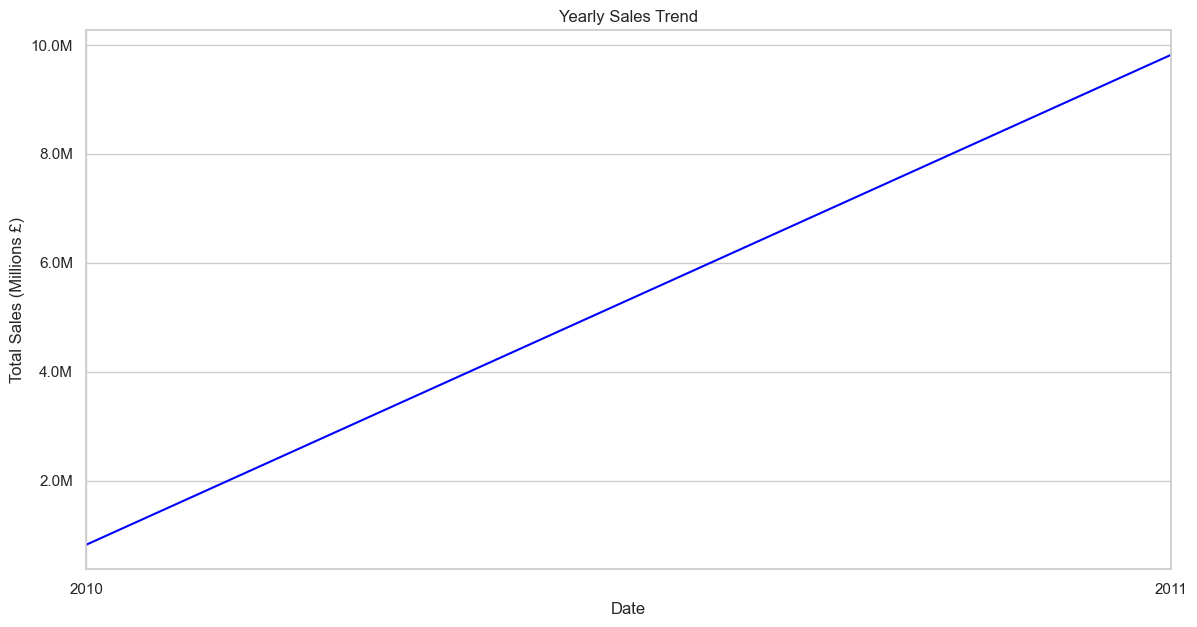

In [75]:
yearly_sales = df.groupby(df['InvoiceDate'].dt.to_period('Y'))['TotalSales'].sum()

plt.figure(figsize=(14, 7))
ax = yearly_sales.plot(color='blue')
plt.title('Yearly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales (Millions £)')
plt.grid(True)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))

plt.show()

In [76]:
customer_orders = df.groupby('CustomerID')['InvoiceNo'].nunique()

repeat_customers = customer_orders[customer_orders > 1]

print(f"Total number of repeat customers: {len(repeat_customers)}")
print(f"Average number of orders for repeat customers: {repeat_customers.mean():.2f}")

Total number of repeat customers: 2846
Average number of orders for repeat customers: 6.76


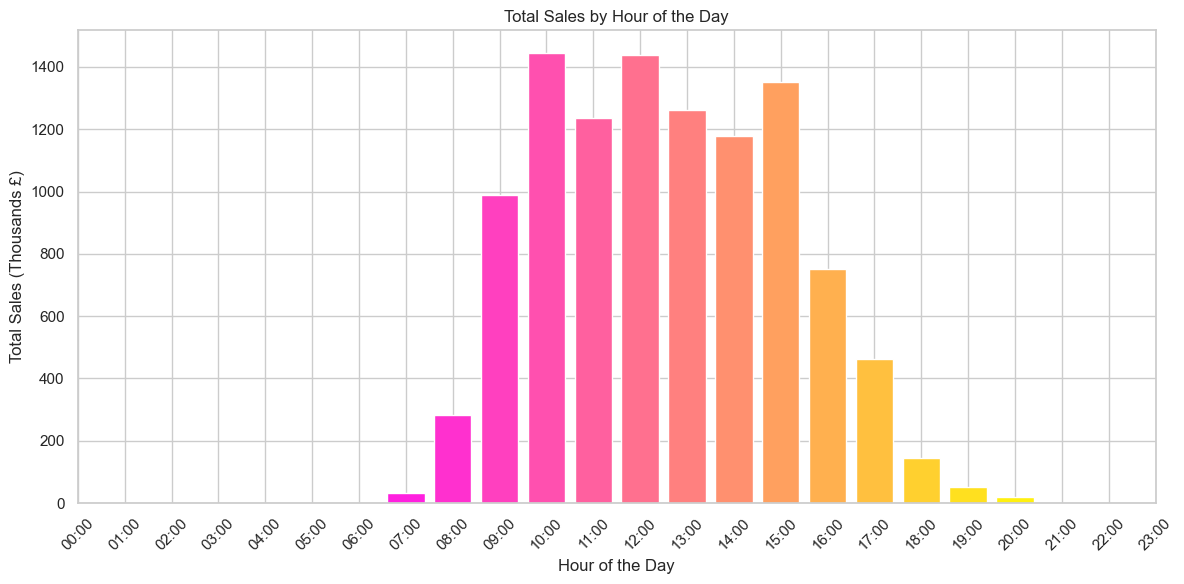

In [85]:

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Hour'] = df['InvoiceDate'].dt.hour


hourly_sales = df.groupby('Hour')['TotalSales'].sum()
palette = sns.color_palette("spring", n_colors=len(hourly_sales))

# plot hourly sales trend
plt.figure(figsize=(12, 6))
ax = plt.gca()
bars = ax.bar(hourly_sales.index, hourly_sales / 1e3, color=palette)  # Convert to thousands
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales (Thousands £)')
plt.grid(True)
plt.xticks(range(24), [f'{i:02d}:00' for i in range(24)], rotation=45)

# format y-axis to display in thousands with one decimal place
def thousands_formatter(x, pos):
    return f'{int(x)}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(thousands_formatter))
plt.tight_layout()
plt.show()